In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve

from heuristic_funcs import *

In [3]:
def auc_plot(y_test_arr, y_pred_arr):
    fpr, tpr, thresholds = roc_curve(y_test_arr, y_pred_arr)
    plt.plot(fpr,tpr)
    plt.show()

In [4]:
data_path = "../data/dedup-data-6187_37728.csv"

df = pd.read_csv(data_path, usecols=['w1', 'w2', 'isDuplicate']).sample(frac=1).reset_index(drop=True)

df_train=df[:int(0.7*len(df))]
df_test =df[int(0.7*len(df)):]

In [5]:
df_train['isDuplicate'].value_counts()

0.0    26368
1.0     4372
Name: isDuplicate, dtype: int64

In [7]:
for th in [3]:
    df_train['predictedDuplicated_{}'.format(th)] = df_train.apply(lambda x: isDuplicateHeuristic(x['w1'], x['w2'], threshold=th), axis=1)

/tmp/ipykernel_422/3168972151.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['predictedDuplicated_{}'.format(th)] = df_train.apply(lambda x: isDuplicateHeuristic(x['w1'], x['w2'], threshold=th), axis=1)


              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96     26368
         1.0       0.96      0.54      0.69      4372

    accuracy                           0.93     30740
   macro avg       0.94      0.77      0.83     30740
weighted avg       0.93      0.93      0.92     30740



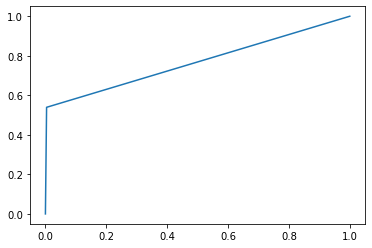

In [8]:
for th in [3]:
    print(classification_report(df_train['isDuplicate'], df_train['predictedDuplicated_{}'.format(th)], target_names=["0.0","1.0"]))
    auc_plot(df_train['isDuplicate'], df_train['predictedDuplicated_{}'.format(th)])
    print('\n')

In [16]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
pd.set_option('display.float_format', '{:.3f}'.format)

In [31]:
th=3
y_truth, y_pred = df_train['isDuplicate'], df_train['predictedDuplicated_{}'.format(th)]

In [35]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
def makeCFwithStats(y_pred, y_truth):
    cf = confusion_matrix(y_truth, y_pred)
    accuracy  = np.trace(cf) / float(np.sum(cf))
    precision = cf[1,1] / sum(cf[:,1])
    recall    = cf[1,1] / sum(cf[1,:])
    f1_score  = 2*precision*recall / (precision + recall)
    stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(accuracy,precision,recall,f1_score)

    df_cm = pd.DataFrame(cf, index = ["Not Duplicate", "Duplicate"],
                    columns = ["Not Duplicate", "Duplicate"])
    plt.figure(figsize = (6,5))
    sn.heatmap(df_cm/np.sum(cf), annot=True, fmt='.2%')
    plt.ylabel('True label', fontsize=14)
    plt.xlabel('Predicted label' + stats_text, fontsize=14)
    plt.show()

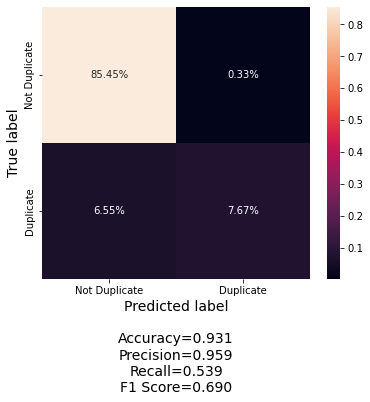

In [36]:
makeCFwithStats(y_pred, y_truth)